## Problem 1 : Predicting SalePrice using GrLivArea 
Extract the following Numeric variables from the dataset, and store as two new Pandas DataFrames.  
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])  Above ground living area in SqFt  
houseSalePrice = pd.DataFrame(houseData['SalePrice'])  Sale Price of house in US Dollars  
 
    a) Plot houseSalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship.  
    Remember the correlation coefficient between these two variables from the last Example Class? Check again.  
    
    b) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression  
    
    c) Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.  
    Train datasets  : houseGrLivArea_train and houseSalePrice_train        (check both have 1100 rows)  
    Test datasets  : houseGrLivArea_test and houseSalePrice_test   (check both have 360 rows)  
    
    d) Training : Fit a Linear Regression model with  X = houseGrLivArea_train   and   y = houseSalePrice_train  
    
    e) Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a Scatterplot  
    of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.   
    
    f) Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the  
    predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.  
    
    g) Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.  

Importing needed libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Importing data and storing as two dataframes 

In [4]:
houseData = pd.read_csv('train.csv')
display(houseData)
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### a) Plot houseSalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship.  
###    Remember the correlation coefficient between these two variables from the last Example Class? Check again.  

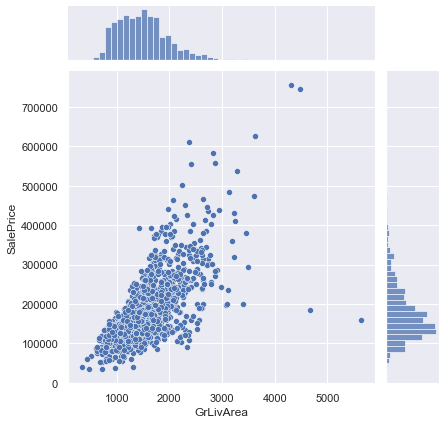

In [5]:
sb.jointplot(x = houseGrLivArea['GrLivArea'], y = houseSalePrice['SalePrice'], kind = 'scatter')

### b) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression  

In [6]:
from sklearn.linear_model import LinearRegression

### c) Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.  
###    Train datasets  : houseGrLivArea_train and houseSalePrice_train        (check both have 1100 rows)  
###    Test datasets  : houseGrLivArea_test and houseSalePrice_test   (check both have 360 rows)  

In [7]:
Train_houseGrLivArea = pd.DataFrame(houseGrLivArea[:1100])
Train_houseSalePrice = pd.DataFrame(houseSalePrice[:1100])
Test_houseGrLivArea = pd.DataFrame(houseGrLivArea[-360:])
Test_houseSalePrice = pd.DataFrame(houseSalePrice[-360:])

In [8]:
print("Train Set :", Train_houseGrLivArea.shape, Train_houseSalePrice.shape)
print("Test Set  :", Test_houseGrLivArea.shape, Test_houseSalePrice.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


### d) Training : Fit a Linear Regression model with  X = houseGrLivArea_train   and   y = houseSalePrice_train  

In [30]:
linreg = LinearRegression()
linreg.fit(Train_houseGrLivArea, Train_houseSalePrice)

LinearRegression()

### e) Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a Scatterplot  
###    of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.   

In [12]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


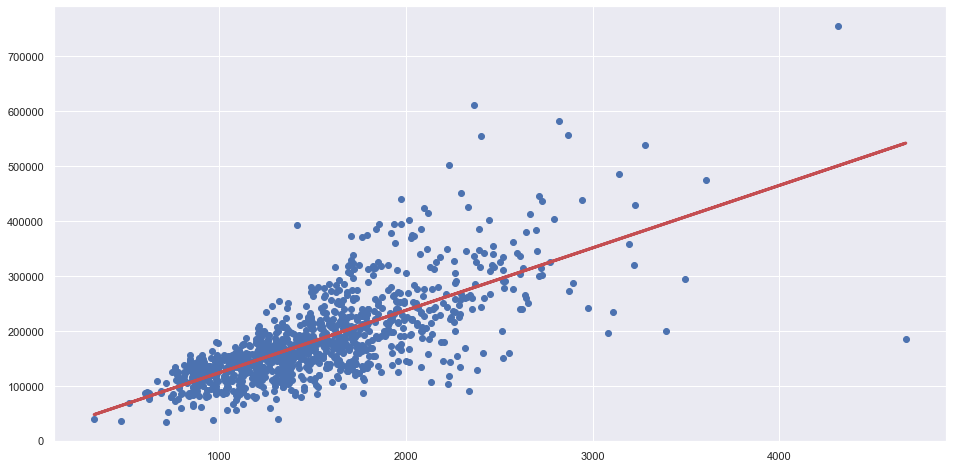

In [31]:
#Regression line formula
regline_x = Train_houseGrLivArea
regline_y = linreg.intercept_ + linreg.coef_ * Train_houseGrLivArea

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(Train_houseGrLivArea, Train_houseSalePrice)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

### f) Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the  
###    predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.  

Predict SalePrice corresponding to GrLivArea

In [32]:
test_pred = linreg.predict(Test_houseGrLivArea)

Plot the Predictions

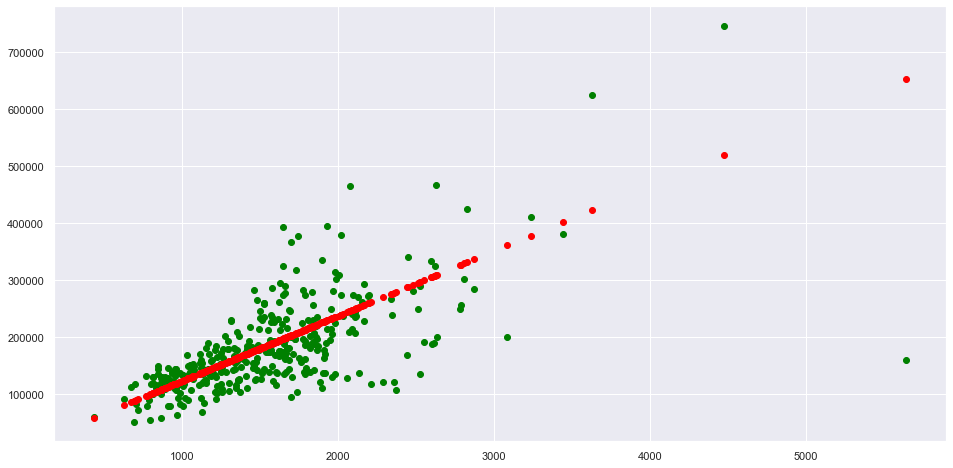

In [33]:
f = plt.figure(figsize=(16, 8))
plt.scatter(Test_houseGrLivArea, Test_houseSalePrice, color = "green")
plt.scatter(Test_houseGrLivArea, test_pred, color = "red")
plt.show()

### g) Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.  

Explained Variance (R^2)

In [34]:
print("Explained Variance (R^2) \t:", linreg.score(Test_houseGrLivArea, Test_houseSalePrice))

Explained Variance (R^2) 	: 0.40117720006925783


Mean Squared Error (MSE)

In [35]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(Test_houseSalePrice, test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 3737081522.29609
Root Mean Squared Error (RMSE) 	: 61131.673642197056


## Problem 2 : Predicting SalePrice using Other Variables 
Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” one-  
by-one to perform individual Linear Regressions. Discuss with your Friends about the models, compare and contrast the   
Explained Variance (R^2), check the predictions, and determine which model is the best to predict “SalePrice”.  

### Creating Datasets

Names of variables to compare

In [36]:
name = ['LotArea','TotalBsmtSF','GarageArea']

Import the data file

In [37]:
houseData = pd.read_csv('train.csv')
data = pd.DataFrame(houseData[name])

Creating Test and Train datasets

In [38]:
train = pd.DataFrame(data[:1100])
test = pd.DataFrame(data[-360:])

### Generating LinearRegression models

LotArea

Intercept 	: b =  [160963.95370929]
Coefficients 	: a =  [[1.91881242]]


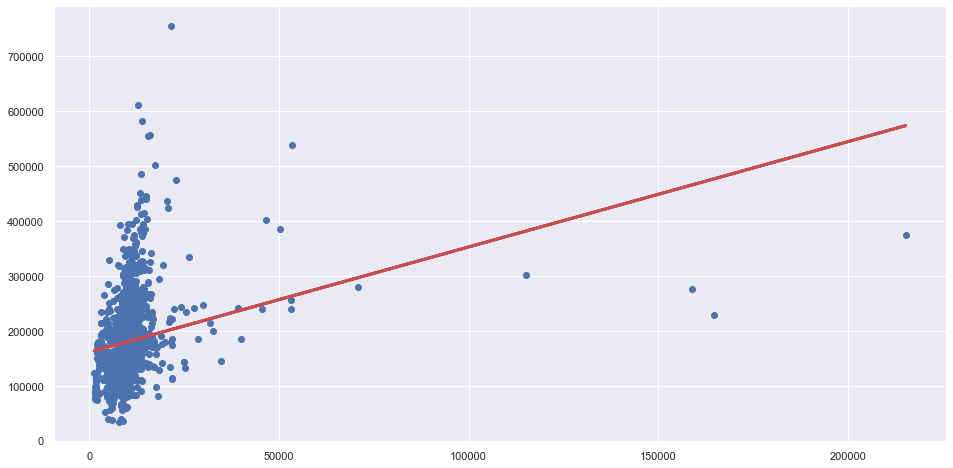

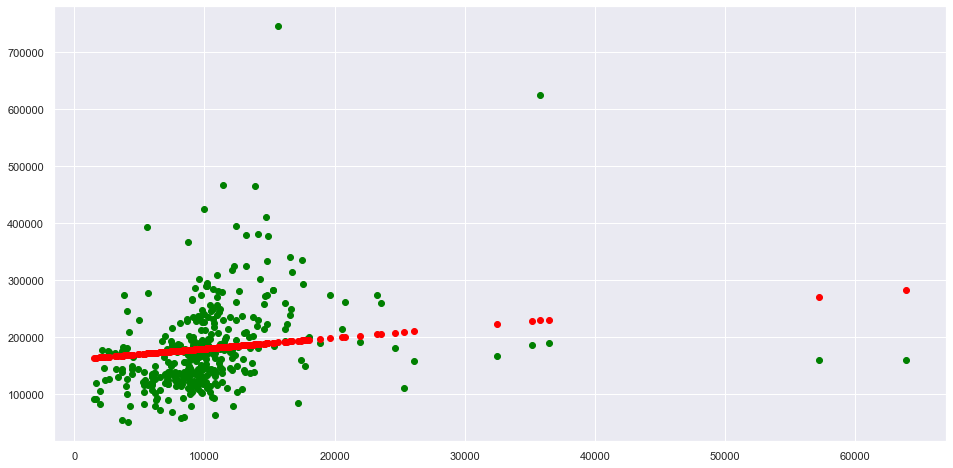

Explained Variance (R^2) 	: 0.06617868448896169
Mean Squared Error (MSE) 	: 5827711275.733228
Root Mean Squared Error (RMSE) 	: 76339.44770387869




TotalBsmtSF

Intercept 	: b =  [54361.70161283]
Coefficients 	: a =  [[120.19979559]]


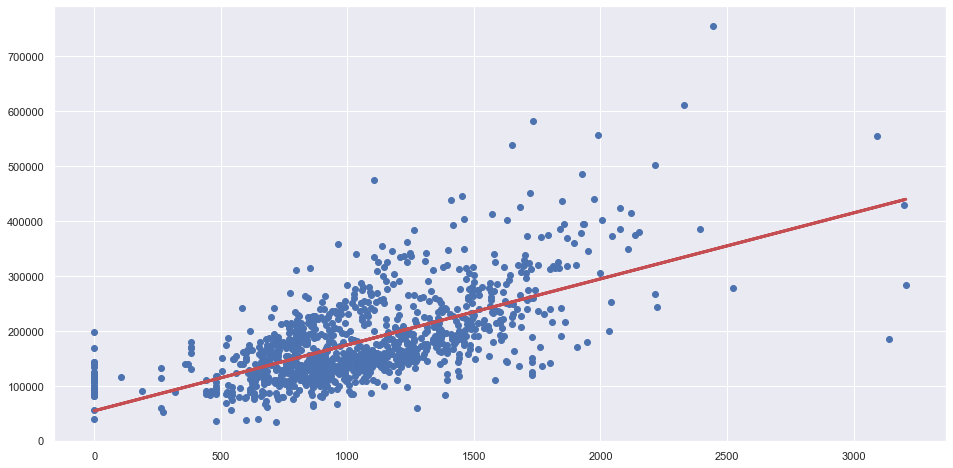

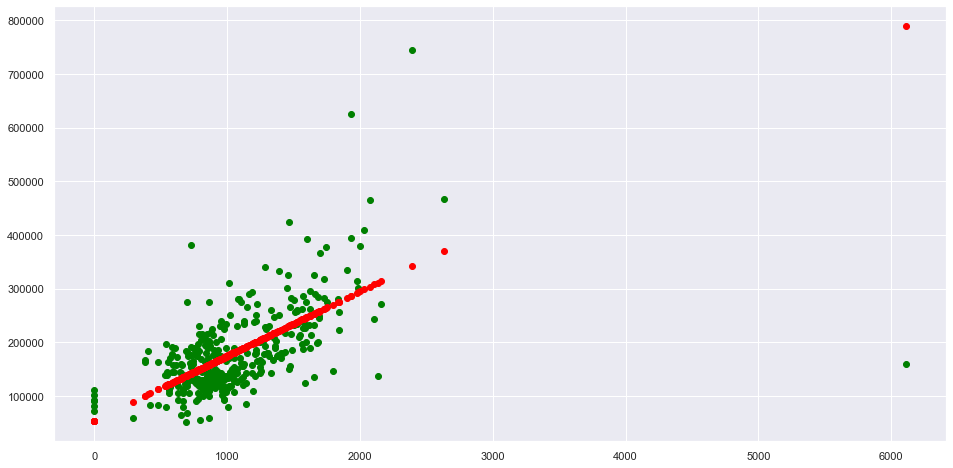

Explained Variance (R^2) 	: 0.26305378699344195
Mean Squared Error (MSE) 	: 4599070168.79018
Root Mean Squared Error (RMSE) 	: 67816.4446781913




GarageArea

Intercept 	: b =  [67131.98072434]
Coefficients 	: a =  [[241.42776434]]


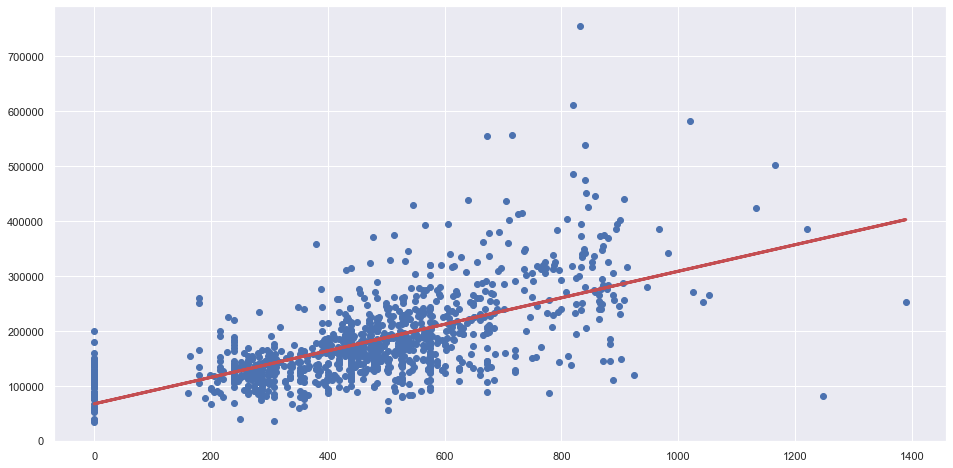

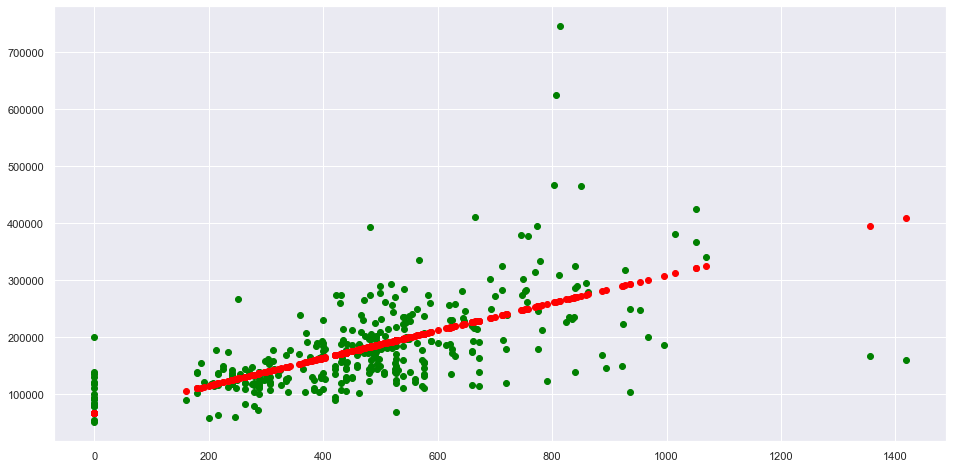

Explained Variance (R^2) 	: 0.33415894889143827
Mean Squared Error (MSE) 	: 4155323226.122655
Root Mean Squared Error (RMSE) 	: 64461.796640511464






In [39]:
for i in range(3):
    print(name[i] + '\n')
    linreg = LinearRegression()
    train_set = pd.DataFrame(train[name[i]])
    test_set = pd.DataFrame(test[name[i]])
    linreg.fit(train_set,Train_houseSalePrice)
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Regression line formula
    regline_x = train_set
    regline_y = linreg.intercept_ + linreg.coef_ * train_set

    # Plot the Linear Regression line
    f1 = plt.figure(figsize=(16, 8))
    plt.scatter(train_set, Train_houseSalePrice)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()
    # Predict Total values corresponding to HP Test
    test_pred = linreg.predict(test_set)

    # Plot the Predictions
    f2 = plt.figure(figsize=(16, 8))
    plt.scatter(test_set, Test_houseSalePrice, color = "green")
    plt.scatter(test_set, test_pred, color = "red")
    plt.show()
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(test_set, Test_houseSalePrice))

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        '''Returns the Mean Squared Error of actual and predicted values'''
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(Test_houseSalePrice, test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
    print('\n\n\n')

GrLivArea is still the one with the highest correlation to the SalePrice. 0.4 is higher than the rest.

## Bonus Question

WIP Undone

In [45]:
from sklearn.model_selection import train_test_split

In [50]:
y = houseData['SalePrice']
X = houseData[['GrLivArea','LotArea','TotalBsmtSF','GarageArea']]

In [62]:
#name = ['GrLivArea','LotArea','TotalBsmtSF','GarageArea']

#houseData = pd.read_csv('train.csv')
#data = pd.DataFrame(houseData[name])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360/1460, random_state = 42)

In [63]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [64]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  -16151.27779099092
Coefficients 	: a =  [ 64.43154202   0.23709613  43.49000112 105.7696555 ]


In [65]:
y_pred = linreg.predict(X_test)

In [66]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual      Predicted
892   154500  128635.636183
1105  325000  294627.941943
413   115000  134123.725861
522   159000  180335.505230
1036  315500  258201.613828
...      ...            ...
346   151500  122102.418646
1214  134500  122594.546405
1137   94000   84994.759616
1365  216000  199011.487055
654   350000  302928.296159

[360 rows x 2 columns]


In [69]:
print(X_train.size)
print(y_train.size)

4400
1100


ValueError: x and y must be the same size

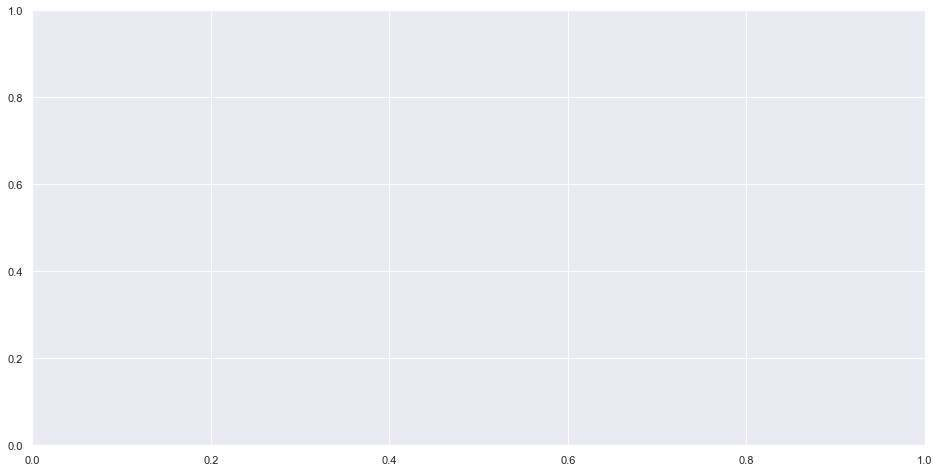

In [67]:


# Regression line formula
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_

# Plot the Linear Regression line
f1 = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()
# Predict Total values corresponding to HP Test
test_pred = linreg.predict(test2)

# Plot the Predictions
f2 = plt.figure(figsize=(16, 8))
plt.scatter(test2, Test_houseSalePrice, color = "green")
plt.scatter(test2, test_pred, color = "red")
plt.show()
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(test_set, Test_houseSalePrice))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(Test_houseSalePrice, test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print('\n\n\n')